In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
#pip install wordcloud

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\Instagram data.csv", encoding='latin1')

In [4]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [5]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


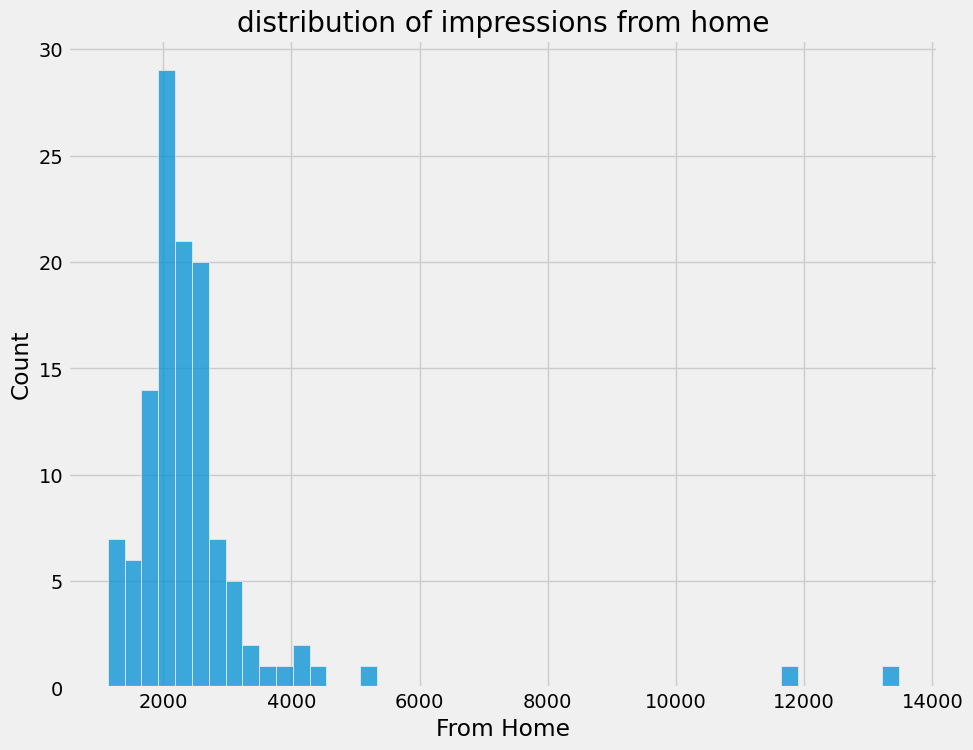

In [22]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('distribution of impressions from home')
sns.histplot(df['From Home'])
plt.show()

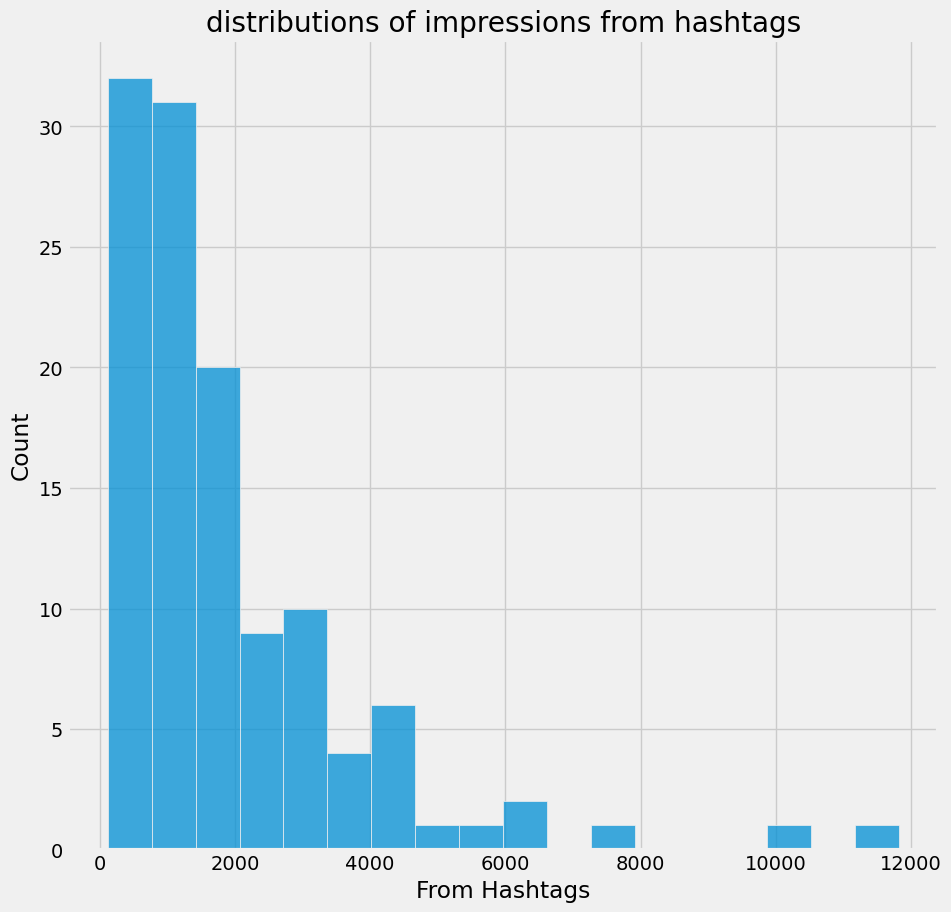

In [28]:
plt.figure(figsize=(10,10))
plt.title('distributions of impressions from hashtags')
sns.histplot(df['From Hashtags'])
plt.show()

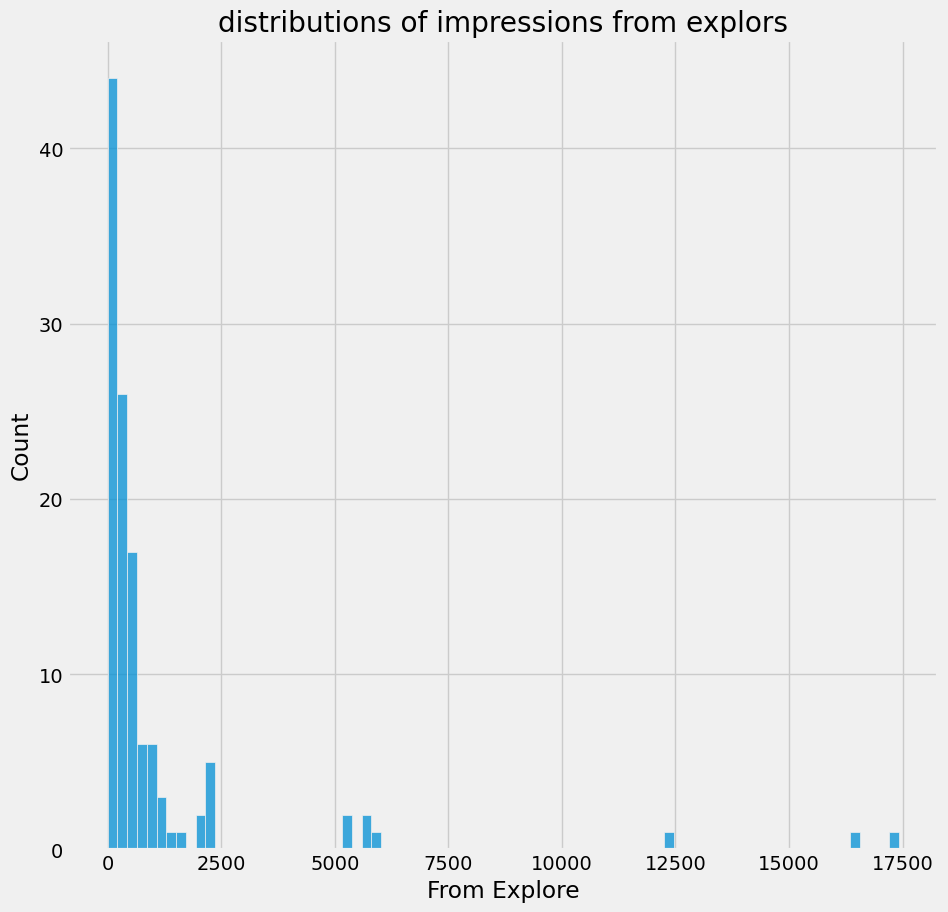

In [36]:
plt.figure(figsize=(10,10))
plt.title('distributions of impressions from explors')
sns.histplot(df['From Explore'])
plt.show()

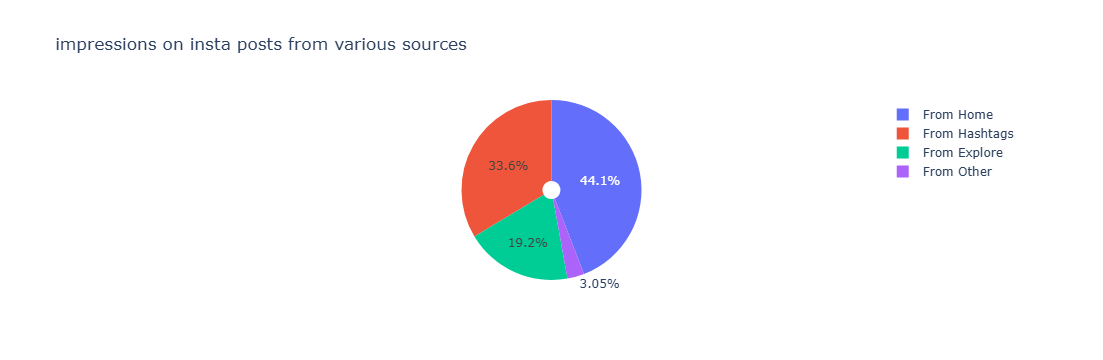

In [44]:
Home = df['From Home'].sum()
Hashtags = df['From Hashtags'].sum()
Explore = df['From Explore'].sum()
Other = df['From Other'].sum()

lebels  = ['From Home','From Hashtags','From Explore','From Other']
values = [Home,Hashtags,Explore,Other]
fig = px.pie(df,values=values,names=lebels,title='impressions on insta posts from various sources',hole=0.1,)
fig.show()

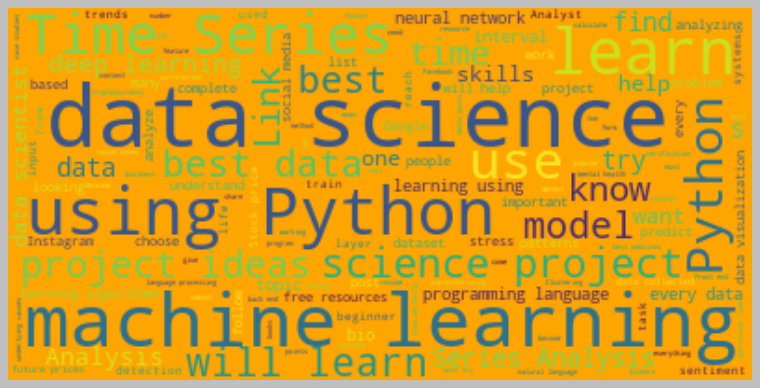

In [56]:
text = ''.join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,background_color = 'orange').generate(text)
plt.style.use('classic')
plt.figure(figsize = (12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

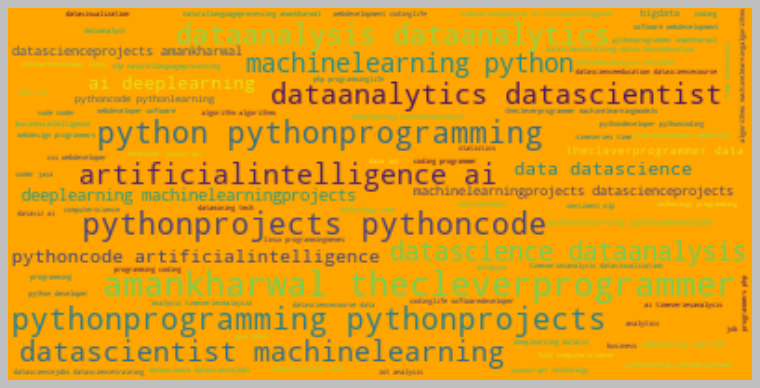

In [58]:
text = ''.join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,background_color = 'orange').generate(text)
plt.style.use('classic')
plt.figure(figsize = (12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

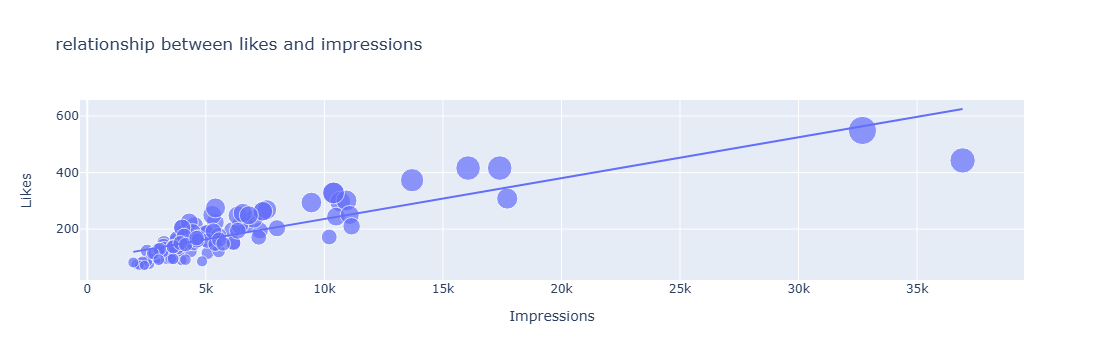

In [102]:
figure=px.scatter(data_frame=df,x='Impressions',y='Likes',size='Likes',trendline='ols',title='relationship between likes and impressions')
figure.show()

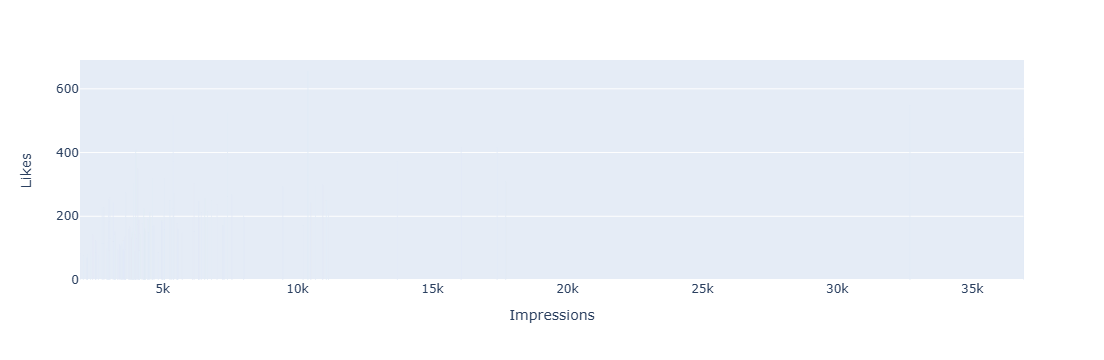

In [110]:
figure=px.bar(data_frame=df,x='Impressions',y='Likes')
figure.show()

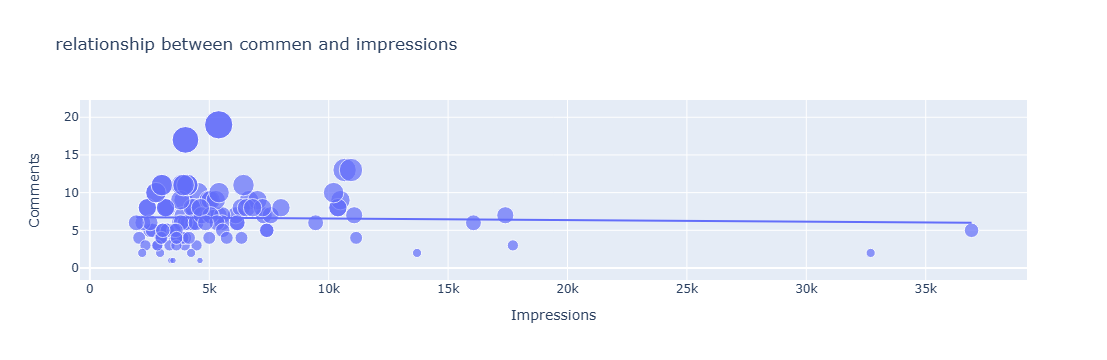

In [120]:
figure=px.scatter(data_frame=df,x='Impressions',y='Comments',size='Comments',trendline='ols',title='relationship between commen and impressions')
figure.show()

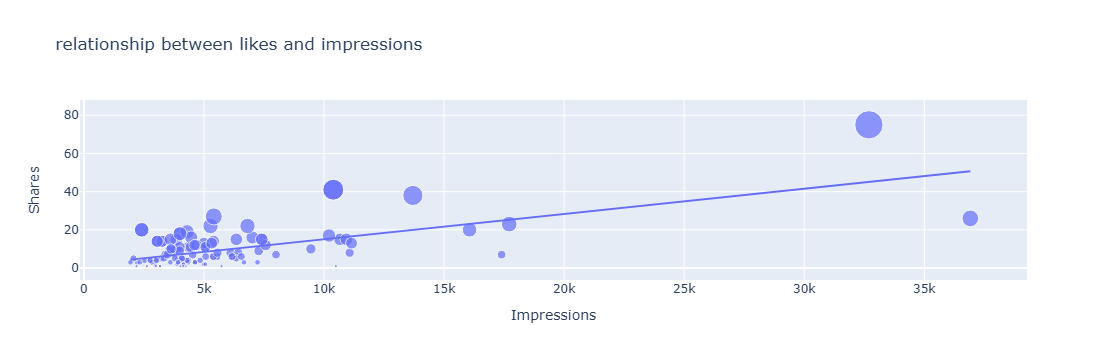

In [118]:
figure=px.scatter(data_frame=df,x='Impressions',y='Shares',size='Shares',trendline='ols',title='relationship between likes and impressions')
figure.show()

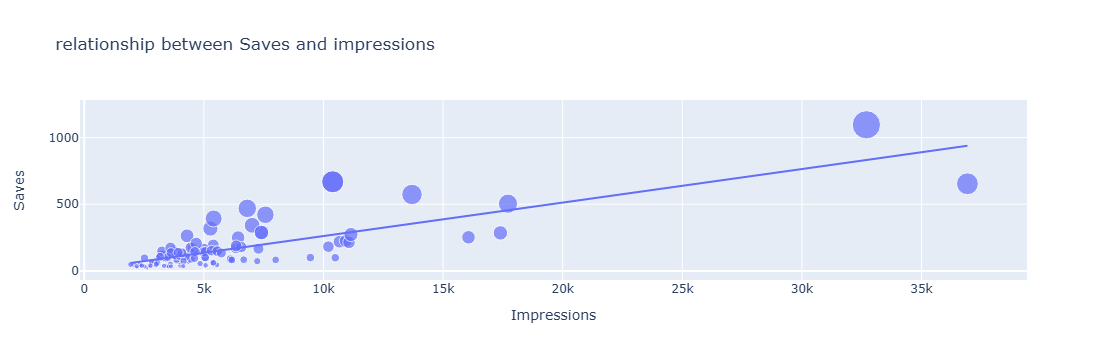

In [122]:
figure=px.scatter(data_frame=df,x='Impressions',y='Saves',size='Saves',trendline='ols',title='relationship between Saves and impressions')
figure.show()

In [130]:
correlation = df.iloc[:,0:-2].corr()
print(correlation['Impressions'].sort_values(ascending=True))

Comments         -0.028524
From Hashtags     0.560760
From Other        0.592960
Shares            0.634675
Profile Visits    0.760981
Saves             0.779231
From Home         0.844698
Likes             0.849835
Follows           0.889363
From Explore      0.893607
Impressions       1.000000
Name: Impressions, dtype: float64


In [132]:
conversion_rate = (df['Follows'].sum()/df['Profile Visits'].sum())*100
print("conversion_rate is:",conversion_rate)

conversion_rate is: 41.00265604249668


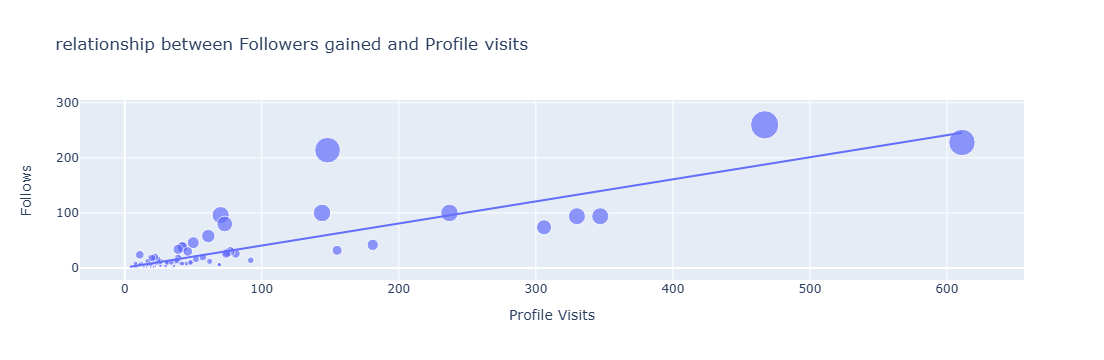

In [140]:
figure=px.scatter(data_frame=df,x='Profile Visits',y='Follows',size='Follows',trendline='ols',title='relationship between Followers gained and Profile visits')
figure.show()

In [192]:
X = np.array(df[['Saves', 'Comments', 'Likes', 'Profile Visits','Follows']])
y = np.array(df['Impressions'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [194]:
model = PassiveAggressiveRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8763790635251332